In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\hp\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
x_data = np.linspace(0.0,10.0,10000000)
x_data

array([0.0000000e+00, 1.0000001e-06, 2.0000002e-06, ..., 9.9999980e+00,
       9.9999990e+00, 1.0000000e+01])

In [3]:
noise = np.random.randn(len(x_data))
noise

array([-1.55387017,  0.54331357, -0.24589739, ..., -0.46754844,
        0.47669703,  1.55391231])

# y = mx+b

In [4]:
# bais = 5
y_true = (0.5 * x_data) + 5 + noise

In [5]:
x_df = pd.DataFrame(data = x_data, columns = ['x-Data'])

In [6]:
y_df = pd.DataFrame(data = y_true,columns=['y-Data'])

In [7]:
x_df.head()

,x-Data
0,0.000000
1,0.000001
2,0.000002
3,0.000003
4,0.000004


In [8]:
y_df.head()

,y-Data
0,3.446130
1,5.543314
2,4.754104
3,5.050047
4,4.398526


In [9]:
my_data = pd.concat([x_df,y_df],axis=1)

In [10]:
my_data.head()

,x-Data,y-Data
0,0.000000,3.446130
1,0.000001,5.543314
2,0.000002,4.754104
3,0.000003,5.050047
4,0.000004,4.398526


In [13]:
my_data.sample(n=250)

,x-Data,y-Data
9398025,9.398026,8.826035
1026952,1.026952,5.455772
423129,0.423129,4.848443
851222,0.851222,4.912885
3526961,3.526961,8.120195
3066797,3.066797,6.061355
3487932,3.487932,5.775421
9188131,9.188132,9.991832
49821,0.049821,4.496755
8037243,8.037244,9.252263


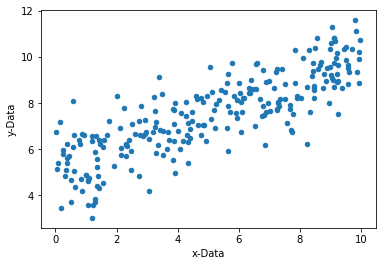

In [14]:
my_data.sample(n=250).plot(kind= 'scatter',x='x-Data',y='y-Data')

In [15]:
batch_size = 8

In [16]:
tf.compat.v1.disable_eager_execution()

In [17]:
m = tf.compat.v1.Variable(0.5)
b = tf.compat.v1.Variable(1.0)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [18]:
xph = tf.compat.v1.placeholder(tf.float32,[batch_size])

In [19]:
yph = tf.compat.v1.placeholder(tf.float32,[batch_size])

In [20]:
y_model = m*xph + b

In [21]:
y_model

<tf.Tensor 'add:0' shape=(8,) dtype=float32>

In [22]:
#Cost Function 
error = tf.compat.v1.reduce_sum(tf.square(yph-y_model))

In [23]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.001)


In [24]:
train = optimizer.minimize(error)

In [25]:
init = tf.compat.v1.global_variables_initializer()

In [26]:
with tf.compat.v1.Session() as sess:
    sess.run(init)
    
    batches = 1000
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        sess.run(train,feed_dict=feed)
        
    model_m ,model_b = sess.run([m,b])

In [27]:
model_m

0.53031206

In [28]:
model_b

4.938217

In [29]:
y_hat = x_data * model_m + model_b

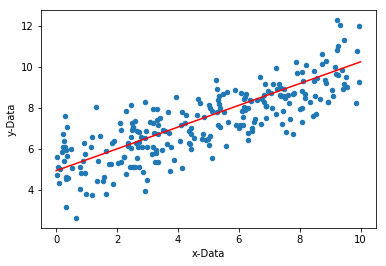

In [30]:
my_data.sample(n=250).plot(kind='scatter',x='x-Data',y='y-Data')
plt.plot(x_data,y_hat,'r')

# Estimetor API

In [31]:
feat_cols = [tf.compat.v1.feature_column.numeric_column('x',shape=[1])]

In [32]:
estimator = tf.compat.v1.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\hp\\AppData\\Local\\Temp\\tmpga2ua3g7', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000024D9B053710>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [33]:
# Train test Split
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_eval, y_train , y_eval = train_test_split(x_data,y_true,test_size=0.3,random_state=0)

In [35]:
x_train

array([4.23690142, 4.73488247, 9.68514397, ..., 2.21510422, 1.48440515,
       8.32580483])

In [36]:
x_eval

array([9.48727395, 1.40914314, 4.86132349, ..., 1.47365515, 5.91384859,
       6.0445946 ])

In [37]:
x_train.shape

(7000000,)

In [38]:
x_eval.shape

(3000000,)

In [39]:
input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=None, shuffle=True)

In [40]:
train_input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000, shuffle=False)

In [41]:
eval_input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000, shuffle=False)

In [42]:
estimator.train(input_fn=input_func,steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model

In [43]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-12-19T17:36:16Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\hp\AppData\Local\Temp\tmpga2ua3g7\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
IN

In [44]:
eval_matrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-12-19T17:37:30Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\hp\AppData\Local\Temp\tmpga2ua3g7\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
IN

In [51]:
input_fu_predict = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,10)},shuffle=False)

In [52]:
list(estimator.predict(input_fn=input_fu_predict))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\hp\AppData\Local\Temp\tmpga2ua3g7\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.4236035], dtype=float32)},
 {'predictions': array([5.050631], dtype=float32)},
 {'predictions': array([5.6776586], dtype=float32)},
 {'predictions': array([6.304686], dtype=float32)},
 {'predictions': array([6.931714], dtype=float32)},
 {'predictions': array([7.558741], dtype=float32)},
 {'predictions': array([8.185769], dtype=float32)},
 {'predictions': array([8.812796], dtype=float32)},
 {'predictions': array([9.439824], dtype=float32)},
 {'predictions': array([10.066852], dtype=float32)}]

In [65]:
predicitions = []
for x in estimator.predict(input_fn=input_fu_predict):
    predicitions.append(x['predicitions'])

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\hp\AppData\Local\Temp\tmpga2ua3g7\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


KeyError: 'predicitions'

In [64]:
predicitions

[]

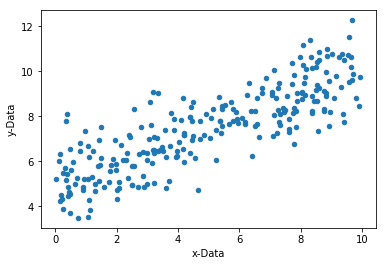

In [67]:
my_data.sample(n=250).plot(kind='scatter',x='x-Data',y='y-Data')
#plt.plot(np.linspace(0,10,10),predicition,'r')